In [32]:
import pandas as pd
import numpy as np

# General csv file with results per iteration
df_log = pd.read_csv('results/without_deck_masks/0_log.csv')
# Contains both masked and non-masked for FCN32s
df_iu_cls = pd.read_csv('results/without_deck_masks/0_iu_cls.csv')
# For FCN16s we have results validated every 10 epochs in separate files.
df16_iu_cls_non_masked = pd.read_csv('/home/dokutagero/repos/fcn/results/deck_masked/without_deck_masks/fcn16s_VCS-8e54a86_TIME-20171228-074253/0_iu_cls.csv')
df16_iu_cls_masked = pd.read_csv('/home/dokutagero/repos/fcn/results/deck_masked/with_deck_masks/fcn16s_VCS-66857e5_TIME-20171228-120130/0_iu_cls.csv')
# Dataframe for FCN8S
df8_iu_cls_non_masked = pd.read_csv('/home/dokutagero/repos/fcn/results/deck_masked/without_deck_masks/fcn8s_VCS-d487f5e_TIME-20171228-085605/0_iu_cls.csv')
df8_iu_cls_masked = pd.read_csv('/home/dokutagero/repos/fcn/results/deck_masked/with_deck_masks/fcn8s_VCS-180aa7b_TIME-20171228-152343/0_iu_cls.csv')


In [33]:


# Selecting subset of values from DataFrames
deck_masked = df_iu_cls[['train_total/iu_cls','valid/iu_cls', 'epoch']].iloc[0:101]
deck_non_masked = df_iu_cls[['train_total/iu_cls','valid/iu_cls', 'epoch']].iloc[101:]
deck_masked_16 = df16_iu_cls_masked[['train_total/iu_cls','valid/iu_cls', 'epoch']]
deck_non_masked_16 = df16_iu_cls_non_masked[['train_total/iu_cls','valid/iu_cls', 'epoch']]
deck_non_masked_8 = df8_iu_cls_non_masked[['train_total/iu_cls','valid/iu_cls', 'epoch']]
deck_masked_8 = df8_iu_cls_masked[['train_total/iu_cls','valid/iu_cls', 'epoch']]



In [34]:
df_iu = pd.DataFrame()
headers = ['non-damage', 'delamination', 'rebar-exposure']
headers_train = [x+t for t in ('_train',) for x in headers]

headers_total = headers + headers_train
# The lambda expression parses a text-encoded numpy array corresponding to the IoU for the classes in headers
# In masked experiments we discard the last value since it's NaN corresponding to "background" (not evaluated)

# DataFrame for FCN32S experiments with mask applied for RoI
df = pd.DataFrame.from_records(deck_masked['valid/iu_cls'].map(lambda x: x[1:-1].split()[:-1]).tolist(), columns=headers).astype('float32')
df2 = pd.DataFrame.from_records(deck_masked['train_total/iu_cls'].map(lambda x: x[1:-1].split()[:-1]).tolist(), columns=headers_train).astype('float32')
df = pd.concat([df, df2], axis=1)

# DataFrame for FCN32S experiments withouth mask.
df_non_masked = pd.DataFrame.from_records(deck_non_masked['valid/iu_cls'].map(lambda x: x[1:-1].split()).tolist(), columns=headers).astype('float32')
df2_non_masked = pd.DataFrame.from_records(deck_non_masked['train_total/iu_cls'].map(lambda x: x[1:-1].split()).tolist(), columns=headers_train).astype('float32')
df_non_masked = pd.concat([df_non_masked, df2_non_masked], axis=1)

# DataFrame for FCN16S with mask.
df_16 = pd.DataFrame.from_records(deck_masked_16['valid/iu_cls'].map(lambda x: x[1:-1].split()[:-1]).tolist(), columns=headers).astype('float32')
df2_16= pd.DataFrame.from_records(deck_masked_16['train_total/iu_cls'].map(lambda x: x[1:-1].split()[:-1]).tolist(), columns=headers_train).astype('float32')
df_16 = pd.concat([df_16, df2_16], axis=1)

# DataFrame for FCN16S without mask
df_non_masked_16 = pd.DataFrame.from_records(deck_non_masked_16['valid/iu_cls'].map(lambda x: x[1:-1].split()).tolist(), columns=headers).astype('float32')
df2_non_masked_16 = pd.DataFrame.from_records(deck_non_masked_16['train_total/iu_cls'].map(lambda x: x[1:-1].split()).tolist(), columns=headers_train).astype('float32')
df_non_masked_16 = pd.concat([df_non_masked_16, df2_non_masked_16], axis=1)

# DataFrame for FCN8S with mask
df_8 = pd.DataFrame.from_records(deck_masked_8['valid/iu_cls'].map(lambda x: x[1:-1].split()[:-1]).tolist(), columns=headers).astype('float32')
df2_8= pd.DataFrame.from_records(deck_masked_8['train_total/iu_cls'].map(lambda x: x[1:-1].split()[:-1]).tolist(), columns=headers_train).astype('float32')
df_8 = pd.concat([df_8, df2_8], axis=1)

# DataFrame for FCN8S without mask
df_non_masked_8 = pd.DataFrame.from_records(deck_non_masked_8['valid/iu_cls'].map(lambda x: x[1:-1].split()).tolist(), columns=headers).astype('float32')
df2_non_masked_8 = pd.DataFrame.from_records(deck_non_masked_8['train_total/iu_cls'].map(lambda x: x[1:-1].split()).tolist(), columns=headers_train).astype('float32')
df_non_masked_8 = pd.concat([df_non_masked_8, df2_non_masked_8], axis=1)

dataframes = [df, df_non_masked, df_16, df_non_masked_16, df_8, df_non_masked_8]


Populating the interactive namespace from numpy and matplotlib
Best delamination/rebar-exposure mean for non masked FCN32S: 0.2987496852874756
Corresponding epoch: 97
Best delamination/rebar-exposure mean for masked FCN32S: 0.3363092541694641
Corresponding epoch: 90
Best delamination/rebar-exposure mean for non masked FCN16S: 0.33988747000694275
Corresponding epoch: 100
Best delamination/rebar-exposure mean for masked FCN16S: 0.38006657361984253
Corresponding epoch: 10
0
Best delamination/rebar-exposure mean for non masked FCN8S: 0.351426362991333
Corresponding epoch: 60
Best delamination/rebar-exposure mean for masked FCN8S: 0.3959383964538574
Corresponding epoch: 80
7


/home/dokutagero/Envs/fcnchainer/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['title', 'colors']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


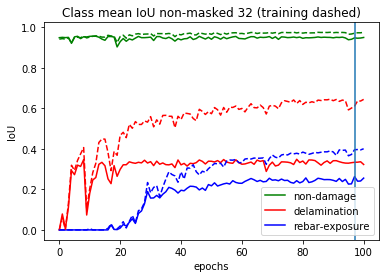

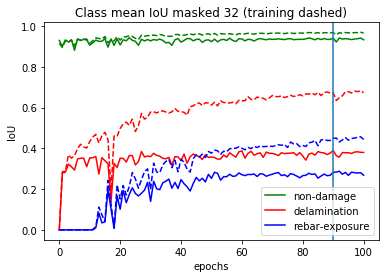

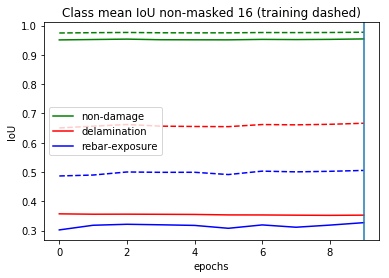

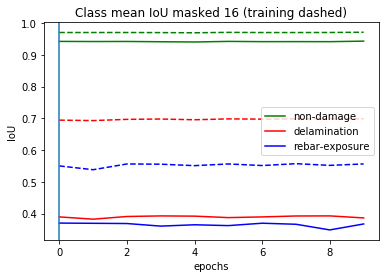

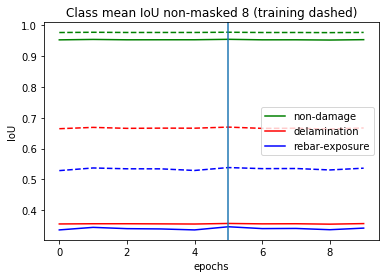

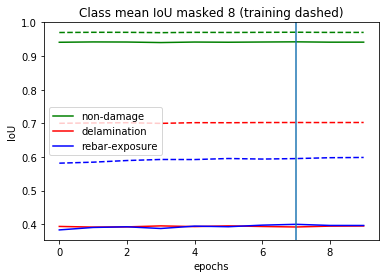

In [31]:
%pylab inline
%matplotlib inline
import matplotlib.pyplot as plt



# Numpy representation of DataFrame
iu_cls_non_masked = df_non_masked.as_matrix()
iu_cls_masked = df.as_matrix()
iu_cls_masked_16 = df_16.as_matrix()
iu_cls_non_masked_16 = df_non_masked_16.as_matrix()
iu_cls_masked_8 = df_8.as_matrix()
iu_cls_non_masked_8 = df_non_masked_8.as_matrix()

# Results for FCN32S
print('Best delamination/rebar-exposure mean for non masked FCN32S: {}'.format(df_non_masked[['delamination', 'rebar-exposure']].mean(axis=1).max()))
non_masked_best = df_non_masked[['delamination', 'rebar-exposure']].mean(axis=1).idxmax()
print('Corresponding epoch: {}'.format(deck_non_masked['epoch'].iloc[non_masked_best]))

print('Best delamination/rebar-exposure mean for masked FCN32S: {}'.format(df[['delamination', 'rebar-exposure']].mean(axis=1).max()))
masked_best = df[['delamination', 'rebar-exposure']].mean(axis=1).idxmax()
print('Corresponding epoch: {}'.format(deck_masked['epoch'].iloc[masked_best]))

# Results for FCN16
print('Best delamination/rebar-exposure mean for non masked FCN16S: {}'.format(df_non_masked_16[['delamination', 'rebar-exposure']].mean(axis=1).max()))
non_masked_best_16 = df_non_masked_16[['delamination', 'rebar-exposure']].mean(axis=1).idxmax()
print('Corresponding epoch: {}'.format(deck_non_masked_16['epoch'].iloc[non_masked_best_16]))

print('Best delamination/rebar-exposure mean for masked FCN16S: {}'.format(df_16[['delamination', 'rebar-exposure']].mean(axis=1).max()))
masked_best_16 = df_16[['delamination', 'rebar-exposure']].mean(axis=1).idxmax()
print('Corresponding epoch: {}'.format(deck_masked_16['epoch'].iloc[masked_best_16]))
print(masked_best_16)

# results for FCN8
print('Best delamination/rebar-exposure mean for non masked FCN8S: {}'.format(df_non_masked_8[['delamination', 'rebar-exposure']].mean(axis=1).max()))
non_masked_best_8 = df_non_masked_8[['delamination', 'rebar-exposure']].mean(axis=1).idxmax()
print('Corresponding epoch: {}'.format(deck_non_masked_8['epoch'].iloc[non_masked_best_8]))


print('Best delamination/rebar-exposure mean for masked FCN8S: {}'.format(df_8[['delamination', 'rebar-exposure']].mean(axis=1).max()))
masked_best_8 = df_8[['delamination', 'rebar-exposure']].mean(axis=1).idxmax()
print('Corresponding epoch: {}'.format(deck_masked_8['epoch'].iloc[masked_best_8]))
print(masked_best_8)

epoch_best_accs = [non_masked_best, masked_best, non_masked_best_16, masked_best_16, non_masked_best_8, masked_best_8]
models = (iu_cls_non_masked, iu_cls_masked, iu_cls_non_masked_16, iu_cls_masked_16, \
                                                iu_cls_non_masked_8, iu_cls_masked_8)
labels = ['non-damage', 'delamination', 'rebar-exposure']
colors = [('green', 'darkgreen'), ('red', 'orange'), ('blue', 'darkblue')]
titles = ['non-masked 32', 'masked 32', 'non-masked 16', 'masked 16', 'non-masked 8', 'masked 8']

# Plotting 
for iu_cls_total, epoch_best_acc, title in zip(models, epoch_best_accs, titles):
    plt.figure()
    plt.xlabel('epochs')
    plt.ylabel('IoU')
    for values, label, color in zip((iu_cls_total[:,0], iu_cls_total[:,1], iu_cls_total[:,2]), labels, colors):
    #for values, label in zip((iu_cls[:,0:3]), labels):
        plt.plot(range(iu_cls_total.shape[0]), values, color=color[0], label=label)

    for values, label, color in zip((iu_cls_total[:,3], iu_cls_total[:,4], iu_cls_total[:,5]), labels, colors):
    #for values, label in zip((iu_cls[:,0:3]), labels):
        plt.plot(range(iu_cls_total.shape[0]), values, '--', color=color[0])
    
    plt.axvline(x=epoch_best_acc)

    plt.title('Class mean IoU {} (training dashed)'.format(title))
    plt.legend()
    plt.show()


In [26]:
experiments = ['FCN32', 'FCN32_non-masked', 'FCN16', 'FCN16_non-masked', 'FCN8', 'FCN8_non-masked']
df_results = pd.DataFrame(columns=headers_total)
df_results['experiment'] = pd.Series(experiments)
df_results = df_results.set_index('experiment')
for dframe, idx_best_acc, experiment in zip(dataframes, epoch_best_accs, experiments):
    df_results.ix[experiment] =  dframe.iloc[dframe[['delamination', 'rebar-exposure']].mean(axis=1).argmax(), :]

# validation-mean-damage only considers damaged classes
df_results['validation-mean-damage'] = df_results[['delamination', 'rebar-exposure']].mean(axis=1)
# validation-mean-total inclues also non-damage
df_results['validation-mean-total'] = df_results[['delamination', 'rebar-exposure', 'non-damage']].mean(axis=1)
    
display(df_results)

/home/dokutagero/Envs/fcnchainer/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: 'argmax' is deprecated. Use 'idxmax' instead. The behavior of 'argmax' will be corrected to return the positional maximum in the future. Use 'series.values.argmax' to get the position of the maximum now.
  
/home/dokutagero/Envs/fcnchainer/lib/python3.6/site-packages/ipykernel_launcher.py:6: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


,non-damage,delamination,rebar-exposure,non-damage_train,delamination_train,rebar-exposure_train,validation-mean-damage,validation-mean-total
experiment,,,,,,,,
FCN32,0.940818,0.389479,0.283139,0.96797,0.673469,0.449023,0.336309,0.537812
FCN32_non-masked,0.948524,0.334015,0.263484,0.971469,0.611238,0.396153,0.298750,0.515341
FCN16,0.942128,0.389804,0.370329,0.970137,0.694368,0.550232,0.380067,0.567420
FCN16_non-masked,0.954387,0.352736,0.327039,0.977224,0.666488,0.505428,0.339887,0.544721
FCN8,0.942362,0.391991,0.399886,0.970882,0.702551,0.595298,0.395938,0.578080
FCN8_non-masked,0.954266,0.356788,0.346064,0.977234,0.669428,0.538153,0.351426,0.552373
